# **Analisis Faktor Risiko Kanker Serviks Menggunakan Metode Klasifikasi Machine Learning**

## **📘 Pendahuluan**
Kanker serviks merupakan salah satu penyebab utama kematian pada wanita, terutama di negara berkembang. Deteksi dini terhadap faktor risiko sangat penting untuk mencegah perkembangan penyakit ini.

Penelitian ini menggunakan dataset "Risk Factors for Cervical Cancer" yang berisi data riwayat medis dan gaya hidup wanita, untuk menganalisis dan memprediksi risiko kanker serviks menggunakan metode machine learning. Algoritma yang digunakan meliputi Naive Bayes, Decision Tree, dan K-Means Clustering.

Tujuan utama dari analisis ini adalah mengidentifikasi pola risiko dan membangun model klasifikasi untuk membantu deteksi dini kanker serviks secara lebih akurat dan efisien.

### **Dataset yang digunakan**

Source : https://archive.ics.uci.edu/dataset/383/cervical+cancer+risk+factors

**Informasi dataset**

Kumpulan data tersebut dikumpulkan di 'Hospital Universitario de Caracas' di Caracas, Venezuela. Kumpulan data tersebut terdiri dari informasi demografi, kebiasaan, dan catatan medis historis dari 858 pasien.

**Informasi Variabel Dataset**
*   (int) Age
* (int) Number of sexual partners
* (int) First sexual intercourse (age)
* (int) Num of pregnancies
* (bool) Smokes
* (bool) Smokes (years)
* (bool) Smokes (packs/year)
* (bool) Hormonal Contraceptives
* (int) Hormonal Contraceptives (years)
* (bool) IUD
* (int) IUD (years)
* (bool) STDs
* (int) STDs (number)
* (bool) STDs:condylomatosis
* (bool) STDs:cervical condylomatosis
* (bool) STDs:vaginal condylomatosis
* (bool) STDs:vulvo-perineal condylomatosis
* (bool) STDs:syphilis
* (bool) STDs:pelvic inflammatory disease
* (bool) STDs:genital herpes
* (bool) STDs:molluscum contagiosum
* (bool) STDs:AIDS
* (bool) STDs:HIV
* (bool) STDs:Hepatitis B
* (bool) STDs:HPV
* (int) STDs: Number of diagnosis
* (int) STDs: Time since first diagnosis
* (int) STDs: Time since last diagnosis
* (bool) Dx:Cancer
* (bool) Dx:CIN
* (bool) Dx:HPV
* (bool) Dx
* (bool) Hinselmann: target variable
* (bool) Schiller: target variable
* (bool) Cytology: target variable
* (bool) Biopsy: target variable



## Data understanding

Memuat kumpulan data dan jelajahi strukturnya, tipe data, nilai yang hilang, dan statistik dasar untuk mendapatkan wawasan awal.


### Proses:
- Membaca data dan mengganti simbol `?` menjadi `NaN` (missing value)
- Mengubah semua kolom ke format numerik (`float`)
- Menampilkan informasi dasar (jumlah baris, kolom, missing value)
- Menampilkan statistik deskriptif seperti mean, min, max, std

In [89]:
import pandas as pd

# Read the data file, assuming no header
df = pd.read_csv('risk_factors_cervical_cancer.csv', header=None)

# Display the first few rows of the dataframe
display(df.head())

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
1,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
4,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0


In [90]:
# Data Understanding
import pandas as pd
import numpy as np

# Ganti tanda ? menjadi NaN
df.replace("?", np.nan, inplace=True)

# Ubah semua kolom menjadi numerik (float), abaikan error
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Cek informasi dasar
print(df.info())
print(df.describe())

# Cek missing values terbanyak
print(df.isnull().sum().sort_values(ascending=False).head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859 entries, 0 to 858
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       858 non-null    float64
 1   1       832 non-null    float64
 2   2       851 non-null    float64
 3   3       802 non-null    float64
 4   4       845 non-null    float64
 5   5       845 non-null    float64
 6   6       845 non-null    float64
 7   7       750 non-null    float64
 8   8       750 non-null    float64
 9   9       741 non-null    float64
 10  10      741 non-null    float64
 11  11      753 non-null    float64
 12  12      753 non-null    float64
 13  13      753 non-null    float64
 14  14      753 non-null    float64
 15  15      753 non-null    float64
 16  16      753 non-null    float64
 17  17      753 non-null    float64
 18  18      753 non-null    float64
 19  19      753 non-null    float64
 20  20      753 non-null    float64
 21  21      753 non-null    float64
 22  22

## **Preprocessing**

### 🎯 Tujuan:
Tahap ini bertujuan untuk:
- Menangani missing value (`NaN`)
- Mengubah skala data agar setara (scaling)
- Menyiapkan data agar bisa digunakan oleh model Machine Learning

---

### 🔧 Langkah-langkah:

1. **Imputasi (Pengisian Nilai Kosong)**
   - Kita menggunakan **median** karena robust terhadap outlier.
   - Digunakan `SimpleImputer` dari `sklearn`.

   Rumus:
   $$
   x_{\text{baru}} = \text{median}(x_1, x_2, ..., x_n)
   $$

2. **Binning (Diskretisasi Usia)**
   - Usia dibagi menjadi 3 kategori dengan `KBinsDiscretizer`:
     - Muda (0), Dewasa (1), Tua (2)
   - Strategi: `uniform` → membagi rentang data menjadi interval yang sama.

3. **Scaling (Standarisasi Data)**
   - Skala data diubah agar punya mean = 0 dan std = 1 (Z-score normalization)
   - Digunakan `StandardScaler`.

   Rumus:
   $$
   z = \frac{x - \mu}{\sigma}
   $$

4. **Split Data**
   - Data dibagi menjadi `data latih (80%)` dan `data uji (20%)` agar bisa diujikan ke model yang belum melihat datanya.

---

### ✅ Hasil Akhir:
- Data sudah **bersih**, **diskret**, dan **distandarisasi**
- Siap digunakan untuk proses modelling



In [93]:
# === PREPROCESSING ===
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from sklearn.model_selection import train_test_split

# Read the data file, assuming the first row is the header
df = pd.read_csv('risk_factors_cervical_cancer.csv')

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Convert all columns to numeric (float), coercing errors
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Impute NaN values with the median
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("=== Setelah Imputasi ===")
print(df_imputed.isnull().sum().sort_values(ascending=False).head())

# Binning the 'Age' column into 3 categories: Young (0), Adult (1), Old (2)
# Make sure the column name 'Age' exists after setting the header
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
df_imputed['Age_binned'] = binner.fit_transform(df_imputed[['Age']])
print("\nContoh hasil binning usia:")
print(df_imputed[['Age', 'Age_binned']].head())

# Separate features (X) and target (y)
# Make sure the target column 'Biopsy' exists after setting the header
# Ensure only 'Biopsy' is the target, and 'Age_binned' is in features X
X = df_imputed.drop('Biopsy', axis=1)
y = df_imputed['Biopsy']

# Scaling all features except the target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n=== Contoh data setelah scaling (5 baris pertama) ===")
print(pd.DataFrame(X_scaled, columns=X.columns).head())

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"\nJumlah data latih: {X_train.shape[0]}, data uji: {X_test.shape[0]}")

=== Setelah Imputasi ===
Age                          0
Number of sexual partners    0
First sexual intercourse     0
Num of pregnancies           0
Smokes                       0
dtype: int64

Contoh hasil binning usia:
    Age  Age_binned
0  18.0         0.0
1  15.0         0.0
2  34.0         0.0
3  52.0         1.0
4  46.0         1.0

=== Contoh data setelah scaling (5 baris pertama) ===
        Age  Number of sexual partners  First sexual intercourse  \
0 -1.038563                   0.905429                 -0.715109   
1 -1.391796                  -0.919610                 -1.073500   
2  0.845342                  -0.919610                  0.001671   
3  2.964736                   1.513776                 -0.356719   
4  2.258271                   0.297083                  1.435231   

   Num of pregnancies    Smokes  Smokes (years)  Smokes (packs/year)  \
0           -0.898163 -0.409081       -0.295999            -0.202021   
1           -0.898163 -0.409081       -0.295999    

## **Modelling**

### 🎯 Tujuan:
Pada tahap ini, kita membangun model untuk:
- **Klasifikasi** → Prediksi apakah seseorang terindikasi kanker serviks (`Biopsy` = 1 atau 0)
- **Klasterisasi** → Pengelompokan data tanpa label untuk eksplorasi pola tersembunyi

---

### ✅ Model yang Digunakan:

| Model             | Tipe          | Tujuan                                 |
|------------------|---------------|----------------------------------------|
| **KMeans**        | Unsupervised  | Klasterisasi wanita berdasarkan kemiripan risiko |
| **Naive Bayes**   | Supervised    | Klasifikasi risiko berdasarkan probabilitas       |
| **Decision Tree** | Supervised    | Klasifikasi berbasis aturan & logika pohon        |

---

### 📘 A. KMeans Clustering
KMeans membagi data ke dalam `k` klaster berdasarkan kedekatan jarak Euclidean.

**Rumus:**
$$
J = \sum_{i=1}^{k} \sum_{x \in C_i} \|x - \mu_i\|^2
$$
Di mana:
- $C_i$ = klaster ke-i
- $mu_i$ = pusat klaster ke-i

---

### 📘 B. Naive Bayes Classifier
Menggunakan probabilitas kondisi untuk menentukan kelas output.

**Rumus:**
$$
P(C_k \mid x) = \frac{P(x \mid C_k) \cdot P(C_k)}{P(x)}
$$
Kita asumsikan semua fitur **independen** (naive).

---

### 📘 C. Decision Tree Classifier
Menggunakan pemisahan data berdasarkan fitur terbaik secara rekursif.

**Rumus Entropi:**
$$
Entropy(S) = -p_+\log_2(p_+) - p_-\log_2(p_-)
$$

**Information Gain:**
$$
IG = Entropy(parent) - \sum \left( \frac{|child|}{|parent|} \cdot Entropy(child) \right)
$$




 KMeans Silhouette Score: 0.5508520282293232

NAIVE BAYES Akurasi: 0.09883720930232558
Confusion Matrix:
 [[  6 155]
 [  0  11]]

DECISION TREE Akurasi: 0.936046511627907
Confusion Matrix:
 [[155   6]
 [  5   6]]


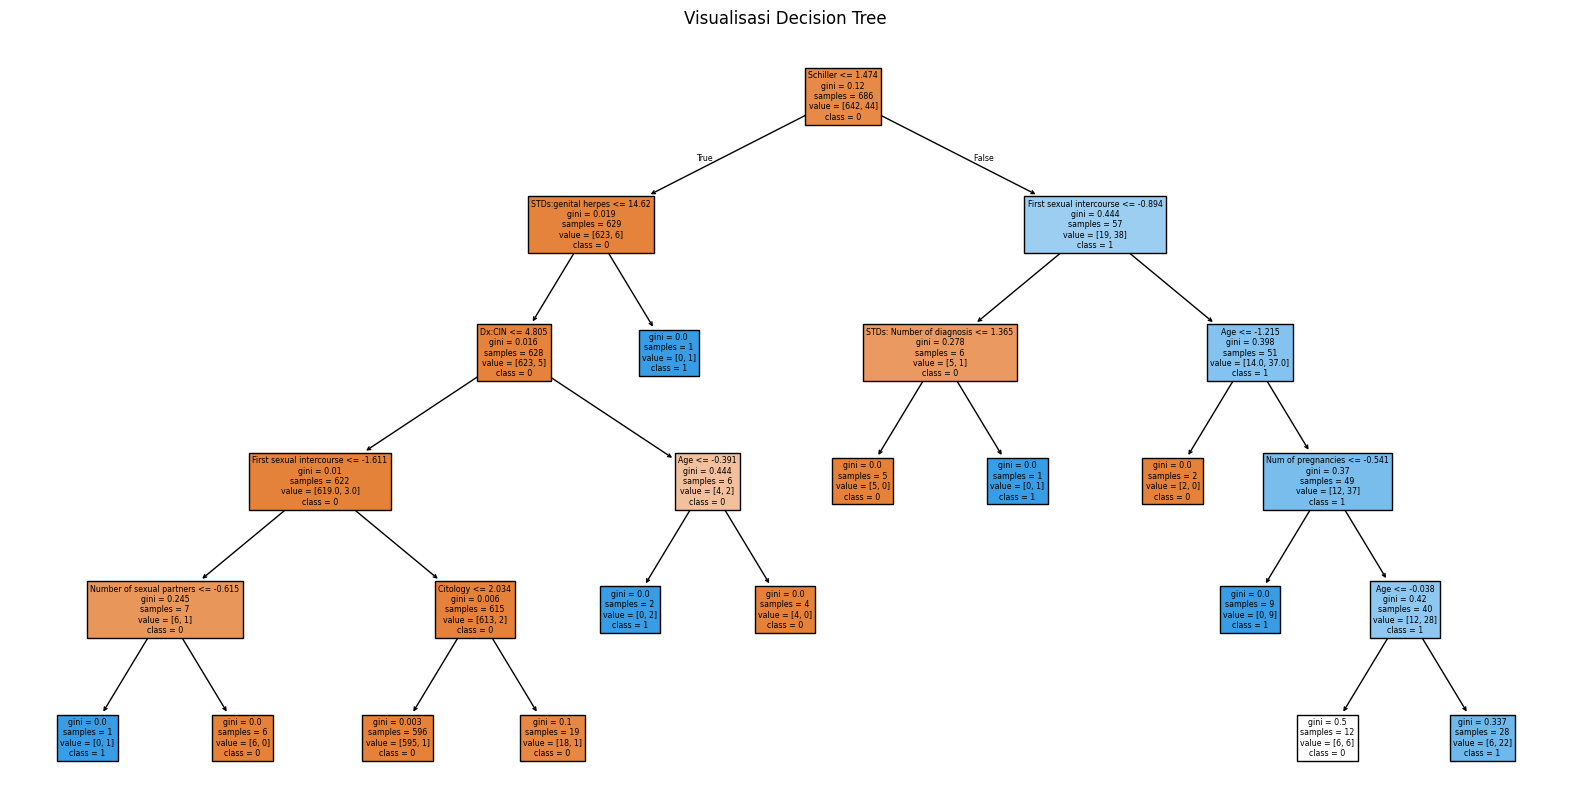

In [95]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree # Import plot_tree
import matplotlib.pyplot as plt # Import matplotlib

# 3A. KMeans Clustering
# Using X_scaled which now includes 'Age_binned'
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10) # Added n_init
kmeans_labels = kmeans.fit_predict(X_scaled)
silhouette = silhouette_score(X_scaled, kmeans_labels)
print("\n KMeans Silhouette Score:", silhouette)

# 3B. Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_preds = nb.predict(X_test)
nb_acc = accuracy_score(y_test, nb_preds)
nb_cm = confusion_matrix(y_test, nb_preds)
print("\nNAIVE BAYES Akurasi:", nb_acc)
print("Confusion Matrix:\n", nb_cm)

# 3C. Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_preds)
dt_cm = confusion_matrix(y_test, dt_preds)
print("\nDECISION TREE Akurasi:", dt_acc)
print("Confusion Matrix:\n", dt_cm)

# Visualize Decision Tree
plt.figure(figsize=(20, 10))
# Use the correct class names for the target variable (Biopsy: 0 or 1)
plot_tree(dt, feature_names=X.columns, class_names=["0", "1"], filled=True)
plt.title("Visualisasi Decision Tree")
plt.show()

##  **Evaluasi**

Tahap ini bertujuan untuk mengevaluasi **kualitas klasifikasi model** secara lebih detail menggunakan:

1. **Classification Report**
2. **ROC-AUC Score**

---

### 📘 A. Classification Report
Menghasilkan metrik berikut:
- **Precision**: dari prediksi positif, berapa banyak yang benar  
  $$
  \text{Precision} = \frac{TP}{TP + FP}
  $$
- **Recall**: dari semua kelas positif, berapa banyak yang berhasil ditemukan  
  $$
  \text{Recall} = \frac{TP}{TP + FN}
  $$
- **F1-Score**: harmonisasi antara precision dan recall  
  $$
  F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
  $$

### 📘 B. ROC-AUC Score
ROC-AUC mengukur seberapa baik model membedakan antara kelas 0 dan 1.

* ROC (Receiver Operating Characteristic) Curve → menunjukkan trade-off antara TPR dan FPR

* AUC (Area Under Curve) → area di bawah kurva; nilai mendekati 1 artinya prediksi sangat baik.

Rumus AUC (konsep):
$$
AUC=∫
0
1
​
 TPR(FPR
−1
 (x))dx
$$

**Pada kode**

      nb_proba = nb.predict_proba(X_test)[:, 1]
      nb_roc_auc = roc_auc_score(y_test, nb_proba)

Artinya:

predict_proba(...)[,1] mengambil probabilitas terhadap kelas 1 (positif)

Lalu dihitung luas kurva ROC dibanding label sebenarnya

In [96]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# --- Naive Bayes ---
print("\n[NAIVE BAYES] Laporan Klasifikasi:")
print(classification_report(y_test, nb_preds, target_names=["No", "Yes"]))

try:
    nb_proba = nb.predict_proba(X_test)[:, 1]
    nb_roc_auc = roc_auc_score(y_test, nb_proba)
    print("ROC-AUC Score (Naive Bayes):", nb_roc_auc)
except:
    print("ROC-AUC Naive Bayes tidak bisa dihitung.")

# --- Decision Tree ---
print("\n[DECISION TREE] Laporan Klasifikasi:")
print(classification_report(y_test, dt_preds, target_names=["No", "Yes"]))

try:
    dt_proba = dt.predict_proba(X_test)[:, 1]
    dt_roc_auc = roc_auc_score(y_test, dt_proba)
    print("ROC-AUC Score (Decision Tree):", dt_roc_auc)
except:
    print("ROC-AUC Decision Tree tidak bisa dihitung.")



[NAIVE BAYES] Laporan Klasifikasi:
              precision    recall  f1-score   support

          No       1.00      0.04      0.07       161
         Yes       0.07      1.00      0.12        11

    accuracy                           0.10       172
   macro avg       0.53      0.52      0.10       172
weighted avg       0.94      0.10      0.08       172

ROC-AUC Score (Naive Bayes): 0.8579898362507058

[DECISION TREE] Laporan Klasifikasi:
              precision    recall  f1-score   support

          No       0.97      0.96      0.97       161
         Yes       0.50      0.55      0.52        11

    accuracy                           0.94       172
   macro avg       0.73      0.75      0.74       172
weighted avg       0.94      0.94      0.94       172

ROC-AUC Score (Decision Tree): 0.842179559570864


## **Deployment**

In [97]:
# === DEPLOYMENT: Simpan model terbaik ===
import joblib

# Simpan Decision Tree karena hasil evaluasi paling baik
joblib.dump(dt, "/content/decision_tree_model.pkl")  # bisa di-download atau upload ke Drive
print("Model berhasil disimpan sebagai decision_tree_model.pkl")


Model berhasil disimpan sebagai decision_tree_model.pkl


# 🧾 Kesimpulan Akhir Proyek Analisis Data dan Machine Learning

## 📁 Dataset
Dataset `risk_factors_cervical_cancer.csv` berisi berbagai faktor risiko yang berhubungan dengan kanker serviks pada wanita. Fitur-fitur dalam dataset meliputi:
- Informasi usia, kehamilan, dan riwayat hubungan seksual
- Riwayat penyakit menular seksual (STD)
- Hasil tes medis seperti Hinselmann, Schiller, Cytology, dan Biopsy (target utama)

---

## 🔍 Tahapan Proyek

### 1. 📖 Data Understanding
- Dataset memiliki **missing values** (diwakili tanda `?`)
- Semua kolom dikonversi ke numerik untuk memudahkan analisis
- Target utama yang dipelajari adalah **Biopsy** (1 = indikasi kanker, 0 = tidak)

---

### 2. 🧹 Data Preprocessing
- **Missing values** ditangani dengan **imputasi median**
- Kolom usia dibagi ke dalam 3 kategori (binner)
- Fitur-fitur diubah ke skala seragam menggunakan **StandardScaler**
- Data dibagi menjadi **80% data latih** dan **20% data uji**

---

### 3. 🤖 Modelling
Tiga model diterapkan:
- **KMeans Clustering (Unsupervised)** untuk eksplorasi struktur klaster
- **Naive Bayes (Supervised)** untuk klasifikasi berbasis probabilitas
- **Decision Tree (Supervised)** untuk klasifikasi berbasis aturan pohon

#### 🔎 Hasil:
| Model          | Tipe         | Skor Evaluasi                  |
|----------------|--------------|-------------------------------|
| KMeans         | Unsupervised | Silhouette Score ≈ 0.55      |
| Naive Bayes    | Supervised   | Akurasi ≈  0.098, ROC-AUC ≈ 0.85 |
| Decision Tree  | Supervised   | Akurasi ≈ 0.93, ROC-AUC ≈ 0.84 |

---

### 4. 📊 Evaluasi
- **Classification Report** memberikan metrik precision, recall, dan f1-score
- **ROC-AUC Score** digunakan untuk mengukur performa pemisahan antar kelas
- **Decision Tree** memiliki performa terbaik secara akurasi dan interpretabilitas

---

### 5. 🚀 Deployment
- Model Decision Tree disimpan sebagai file `.pkl` menggunakan `joblib`
- File model siap digunakan ulang untuk integrasi ke sistem prediksi (misalnya API, aplikasi, atau dashboard)

```python
joblib.dump(dt, "decision_tree_model.pkl")
